# Data Description 
### This is a regression Problem statement.
# Columns Name:-

### 1. Unnamed: 0 : -  index Number (int)
### 2. S.No : -serial Number (int)
### 3. USERNAME :- Username Name (object)
### 4. Caption :- Caption (object)
### 5. Followers :- Followers	(int)
### 6. Hashtags :- Hashtags (object)
### 7. Time since posted :- Time since posted (object)
### 8.Likes :- Likes (int)

# Target Feature 
### Likes.

# Data Shape
### 1. Row :- 100
### 2. Columns :- 8



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [6]:
df = pd.read_csv('data/instagram.csv')

In [7]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [8]:
# columns 
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [9]:
# find nan values

df.isna().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [24]:
# drop this columns
df = df.drop(labels=["Unnamed: 0" , "S.No"] , axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [11]:
df['Time since posted'].unique()

array(['11 hours', '2 hours', '3 hours', '4 hours', '7 hours', '8 hours',
       '9 hours', '5 hours', '20 hours', '14 hours', '24 hours'],
      dtype=object)

In [13]:
# remove hours in data 

df['Time since posted']=df['Time since posted'].str.replace('hours' , " ")

In [14]:
df['Time since posted'] = df['Time since posted'].astype("int")

In [15]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [16]:
def WordCloudPlotter(dfColumn):
    colData = df[dfColumn]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
  
    plt.show() 

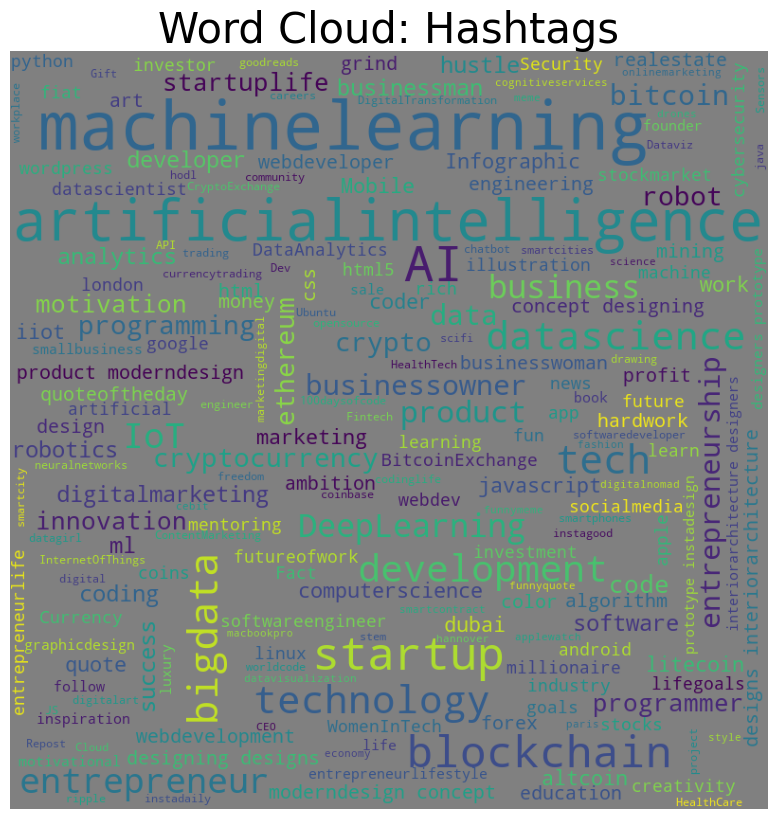

In [17]:
WordCloudPlotter('Hashtags')

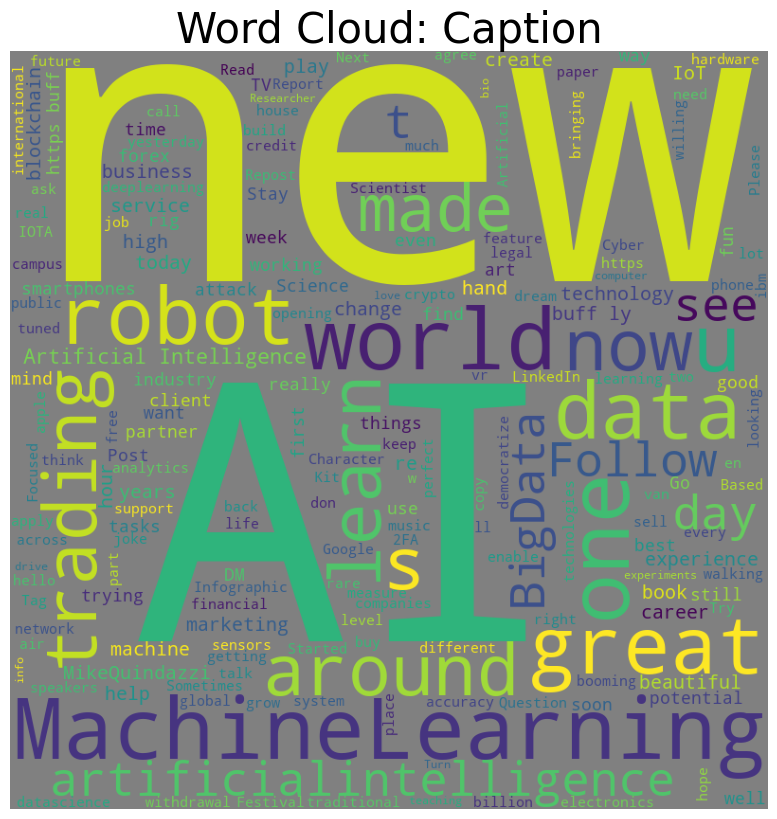

In [18]:
WordCloudPlotter('Caption')

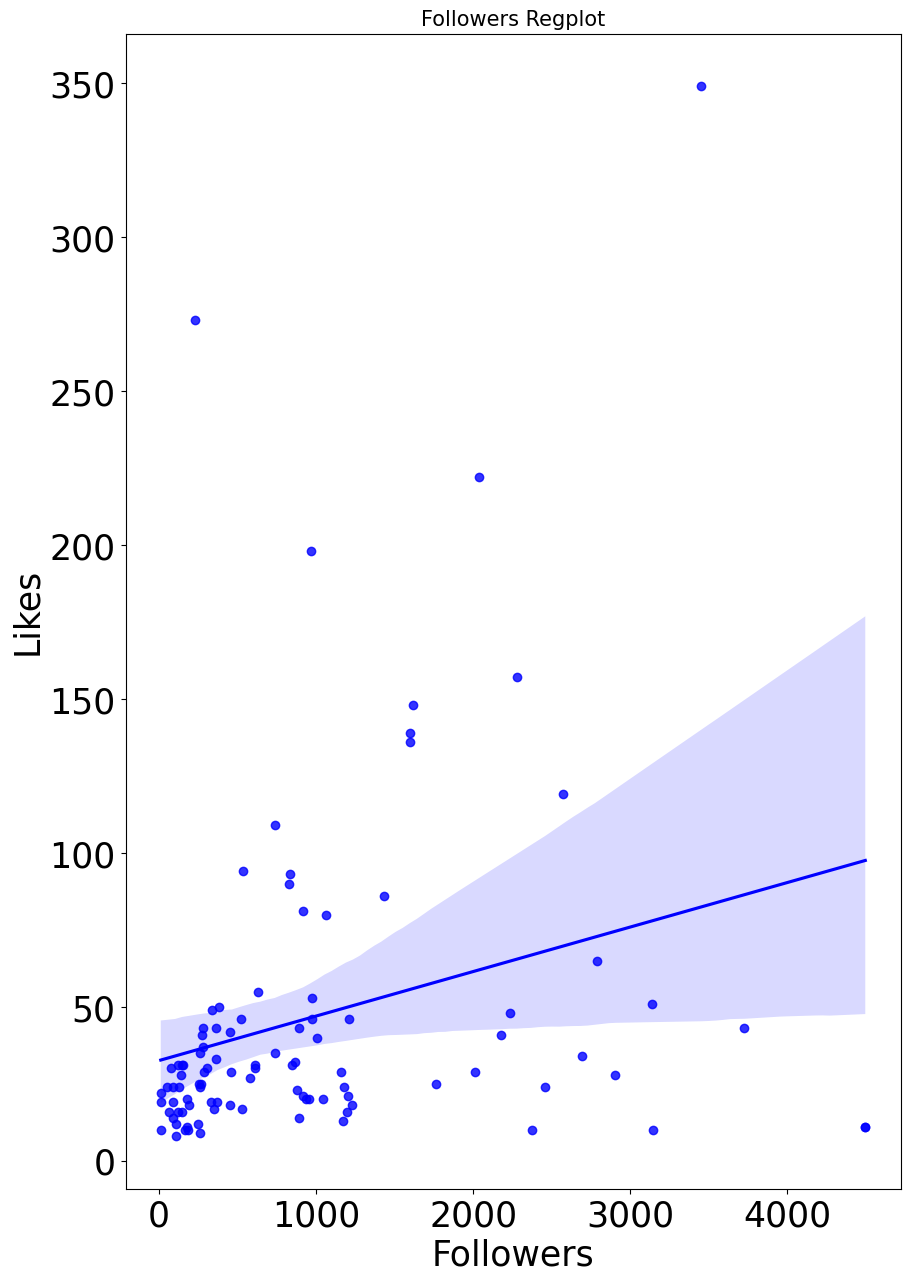

In [19]:
plt.figure(figsize = (10,15))
plt.title('Followers Regplot' , size = 15)
sns.regplot(x = df['Followers'] , y = df["Likes"] , color = 'blue')
plt.show()

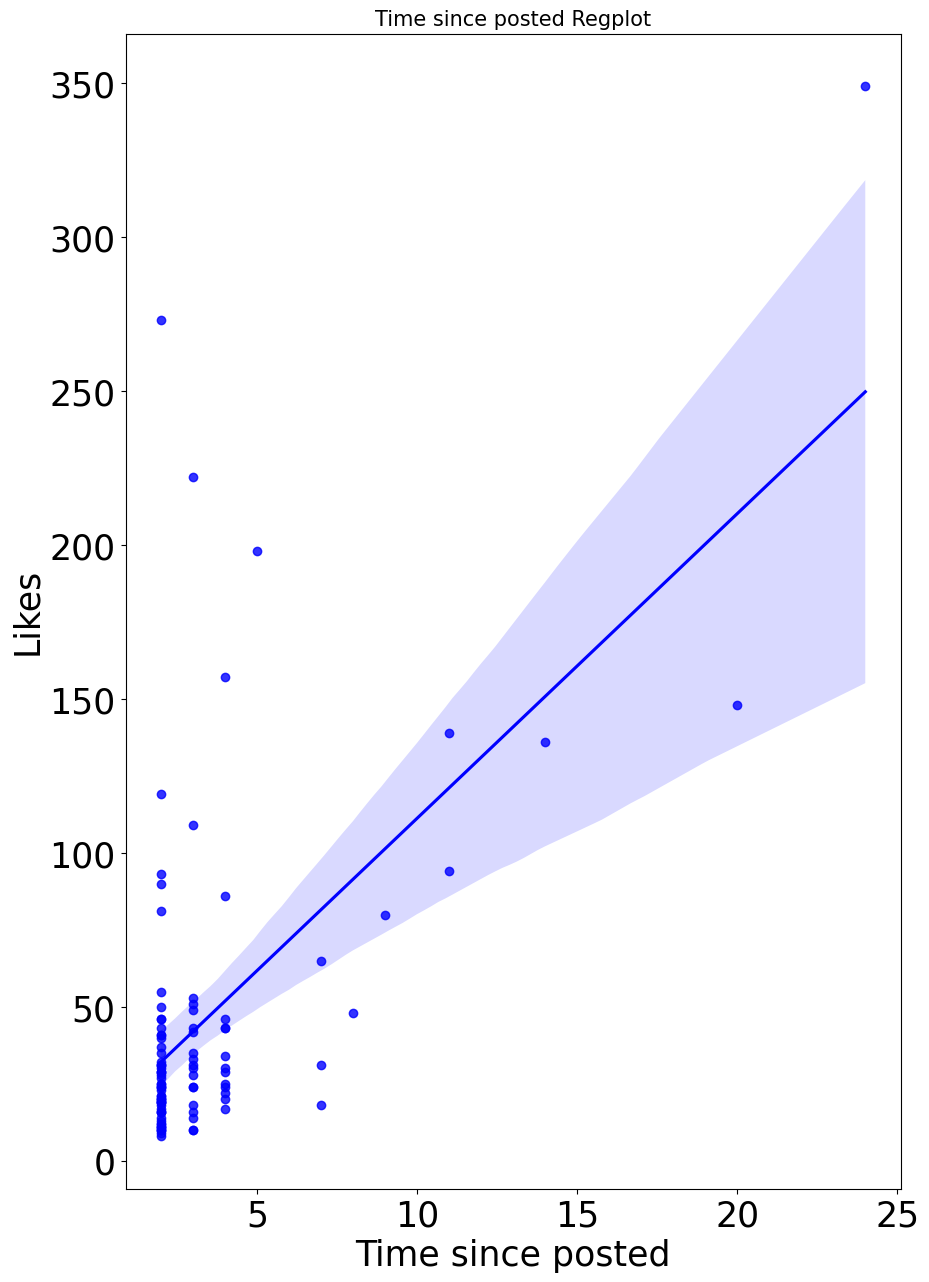

In [20]:
plt.figure(figsize = (10,15))
plt.title('Time since posted Regplot' , size = 15)
sns.regplot(x = df['Time since posted'] , y = df["Likes"] , color = 'blue')
plt.show()

In [25]:
# define numerical and categorical columns

numerical_cols = []
categorical_cols = []

for col in df.columns:
    if df[col].dtypes == 'O':
        
        categorical_cols.append(col)
    elif df[col].dtypes != "O":
        numerical_cols.append(col)
        
    else:
        pass
    

In [27]:
numerical_cols

['Followers', 'Time since posted', 'Likes']

In [28]:
categorical_cols

['USERNAME', 'Caption', 'Hashtags']

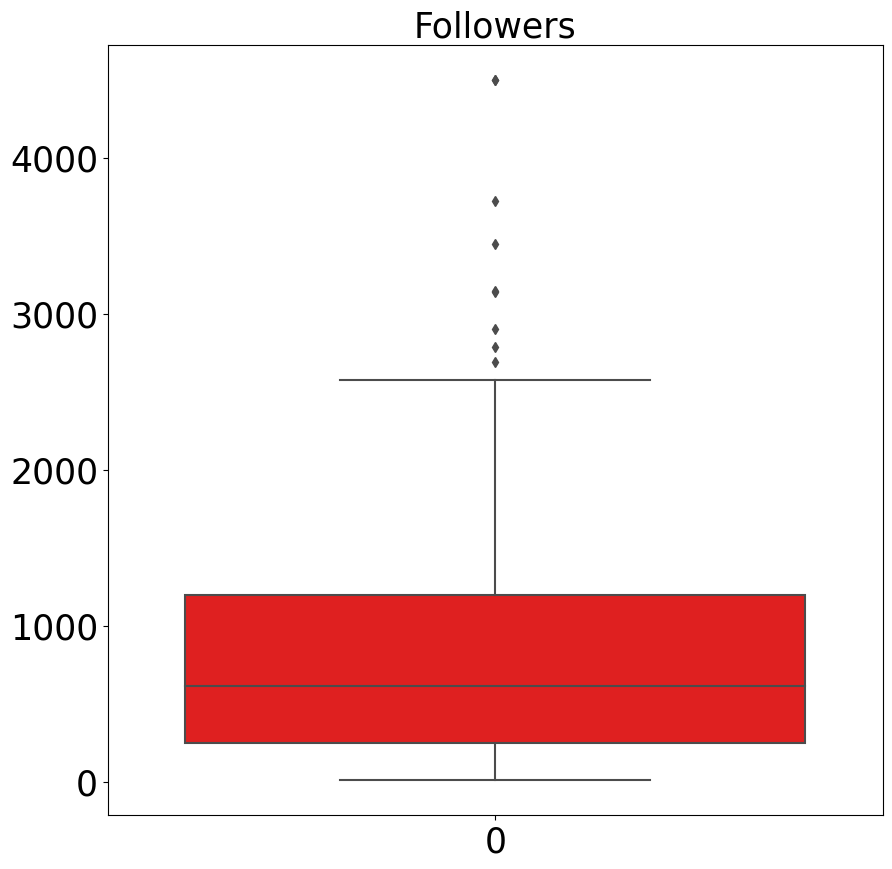

*******************************************************************************************


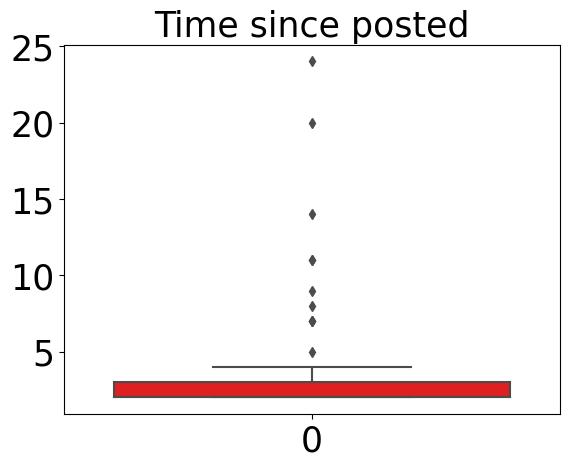

*******************************************************************************************


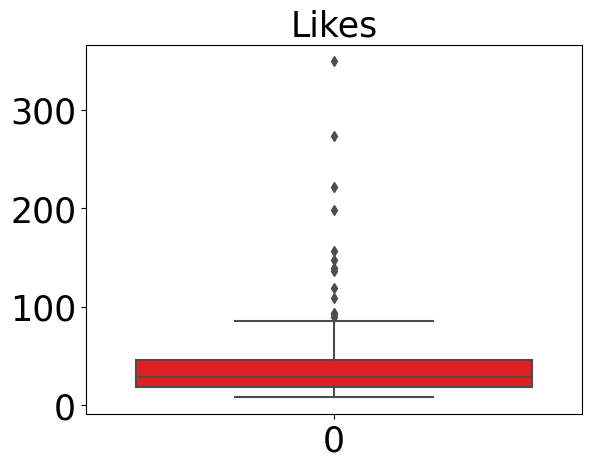

*******************************************************************************************


In [29]:
# find outliers in numerical columns
plt.figure(figsize=(10,10))
for col in numerical_cols:
    sns.boxplot(df[numerical_cols][col], color = 'red')
    plt.title(col , size = 25)
    plt.show()
    print('*******************************************************************************************')
    

# obeservation
### some outliers in time since posted followers ,most of outliers in likes



****************************************************************************************


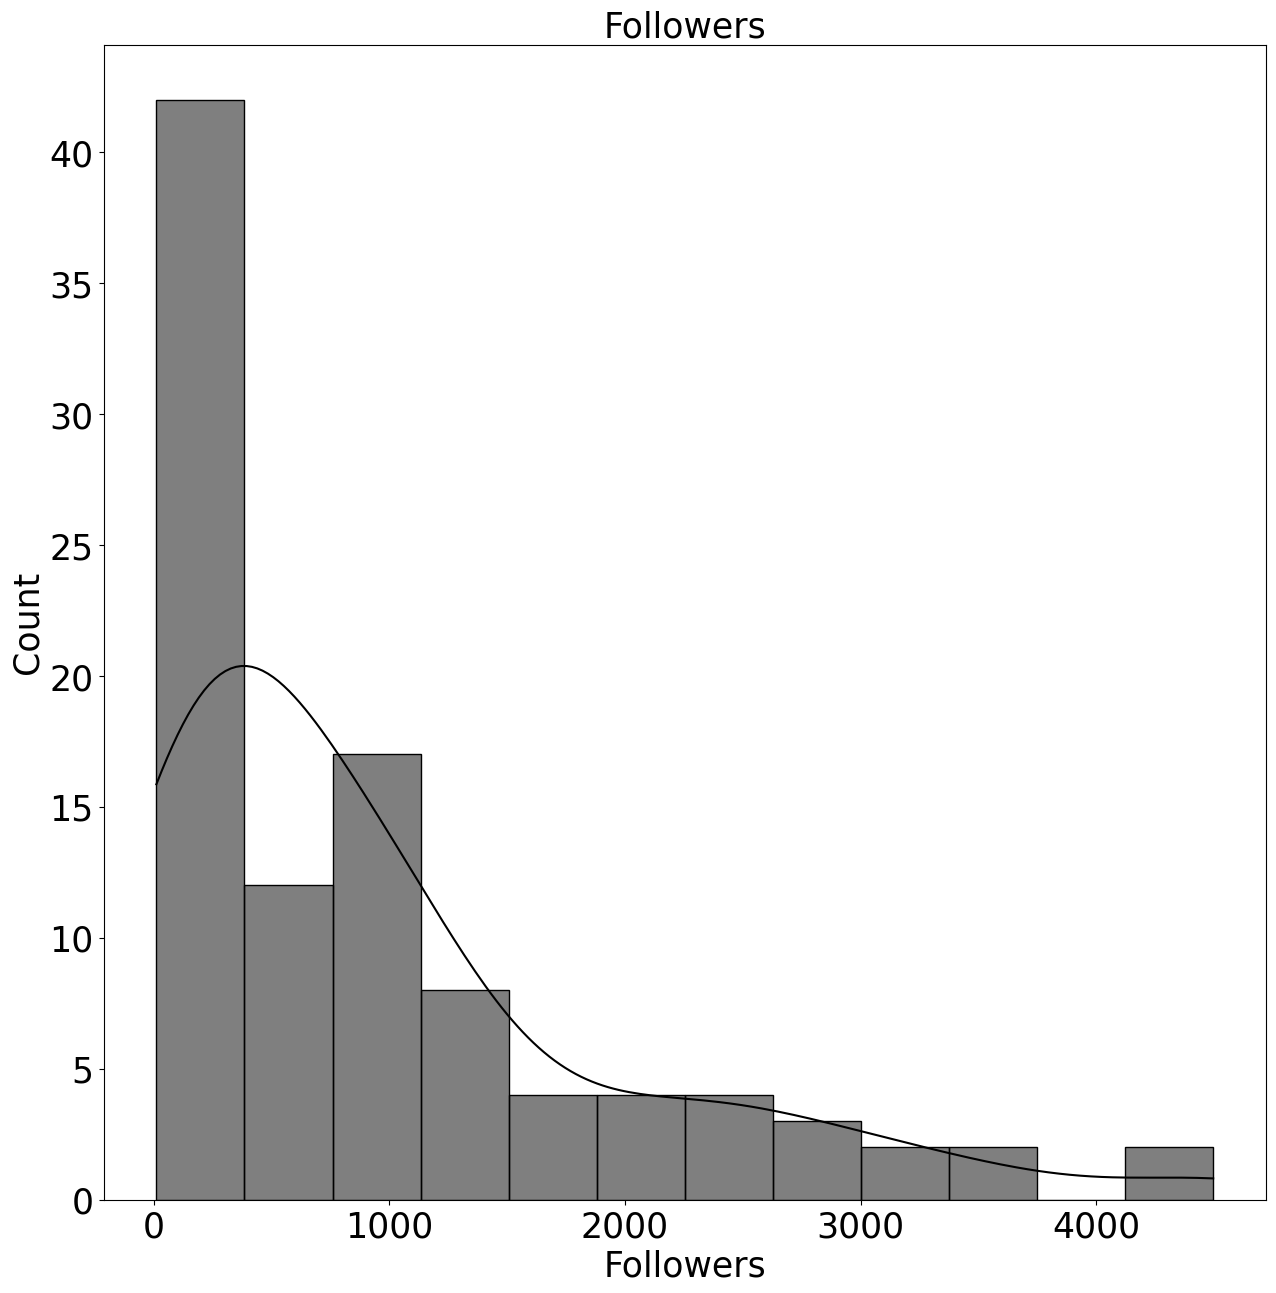



****************************************************************************************


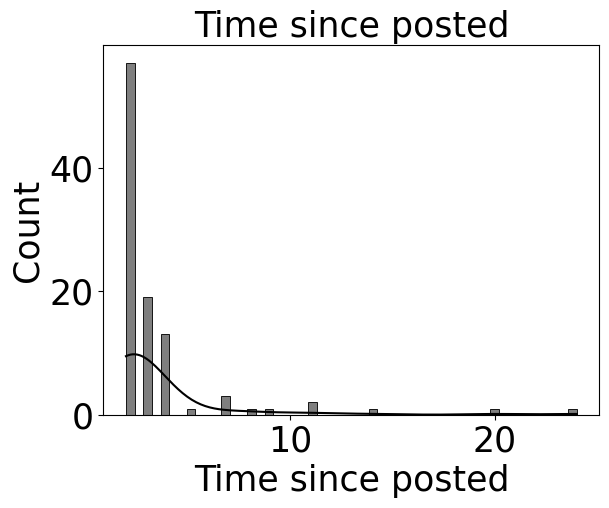



****************************************************************************************


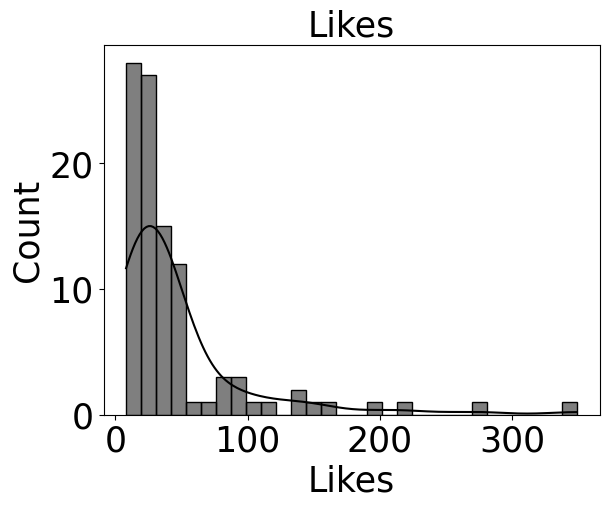

In [30]:
# Number Distribution in numerical columns
plt.figure(figsize=(15,15))

for col in numerical_cols:
    sns.histplot(data = df , x = col , kde = True , color = 'black')
    plt.title(col , size = 25)
    print('\n')
    print('****************************************************************************************')
    plt.show()

<Axes: >

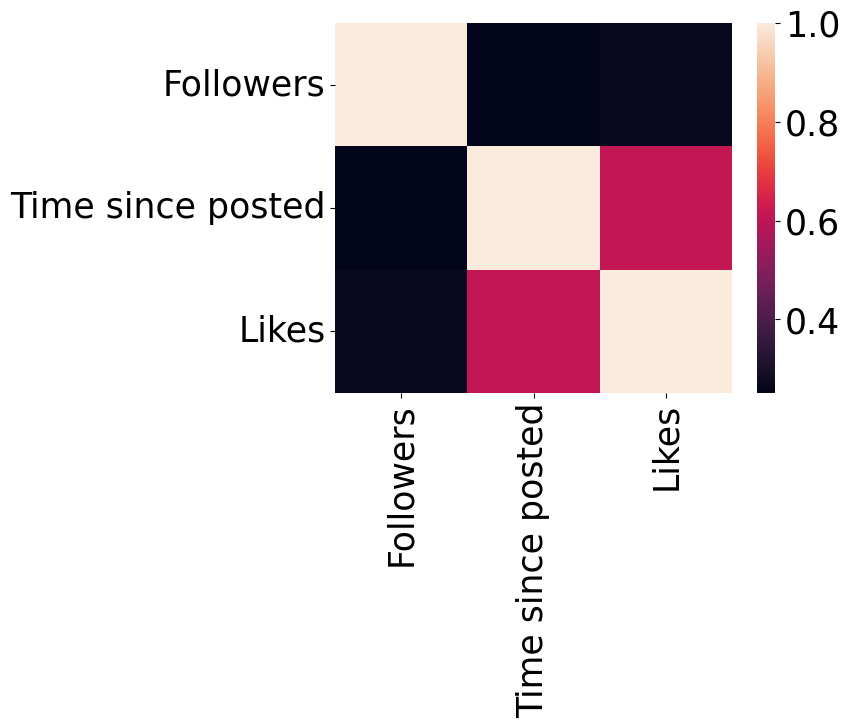

In [31]:
sns.heatmap(df[numerical_cols].corr() , annot =False)

In [32]:
# this feature is not useful so drop this feature

df.drop(labels = [ 'USERNAME' ,'Caption' ,'Hashtags' ] ,axis = 1 , inplace = True )

In [33]:
df.head()

,Followers,Time since posted,Likes
0,1600,11,139
1,880,2,23
2,255,2,25
3,340,3,49
4,304,3,30
